In [1]:
!pip install emnist

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Load our MNIST dataset.
(XTrain, YTrain), (XTest, YTest) = mnist.load_data()

print('XTrain class = ',type(XTrain))
print('YTrain class = ',type(YTrain))

# shape of our dataset.
print('XTrain shape = ',XTrain.shape)
print('XTest shape = ',XTest.shape)
print('YTrain shape = ',YTrain.shape)
print('YTest shape = ',YTest.shape)
# Number of distinct values of our MNIST target
print('YTrain values = ',np.unique(YTrain))
print('YTest values = ',np.unique(YTest))
# Distribution of classes in our dataset.
unique, counts = np.unique(YTrain, return_counts=True)
print('YTrain distribution = ',dict(zip(unique, counts)))
unique, counts = np.unique(YTest, return_counts=True)
print('YTest distribution = ',dict(zip(unique, counts)))


11490434/11490434 [==============================] - 1s 0us/step
XTrain class =  <class 'numpy.ndarray'>
YTrain class =  <class 'numpy.ndarray'>
XTrain shape =  (60000, 28, 28)
XTest shape =  (10000, 28, 28)
YTrain shape =  (60000,)
YTest shape =  (10000,)
YTrain values =  [0 1 2 3 4 5 6 7 8 9]
YTest values =  [0 1 2 3 4 5 6 7 8 9]
YTrain distribution =  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
YTest distribution =  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [4]:
XTrain = XTrain.astype('float32') / 255
XTest = XTest.astype('float32') / 255
XTrain = XTrain.reshape((len(XTrain), np.prod(XTrain.shape[1:])))
XTest = XTest.reshape((len(XTest), np.prod(XTest.shape[1:])))
print (XTrain.shape)
print (XTest.shape)

(60000, 784)
(10000, 784)


In [5]:
InputModel = Input(shape=(784,))
EncodedLayer = Dense(32, activation='relu')(InputModel)
DecodedLayer = Dense(784, activation='softmax')(EncodedLayer)
AutoencoderModel = Model(InputModel, DecodedLayer)
AutoencoderModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
import tensorflow as tf

AutoencoderModel.compile(optimizer='adadelta', loss='binary_crossentropy')
history = AutoencoderModel.fit(XTrain, XTrain,
                    batch_size=256,
                    epochs=10,
                    shuffle=True,
                    validation_data=(XTest, XTest),
                               use_multiprocessing=True)
DecodedDigits = AutoencoderModel.predict(XTest)

Epoch 1/10
235/235 [==============================] - 4s 5ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6924 - val_loss: 0.6923
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6922 - val_loss: 0.6921
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6920 - val_loss: 0.6919
Epoch 7/10
235/235 [==============================] - 2s 7ms/step - loss: 0.6918 - val_loss: 0.6917
Epoch 8/10
235/235 [==============================] - 1s 6ms/step - loss: 0.6916 - val_loss: 0.6915
Epoch 9/10
235/235 [==============================] - 2s 8ms/step - loss: 0.6914 - val_loss: 0.6913
Epoch 10/10
313/313 [==============================] - 1s 3ms/step


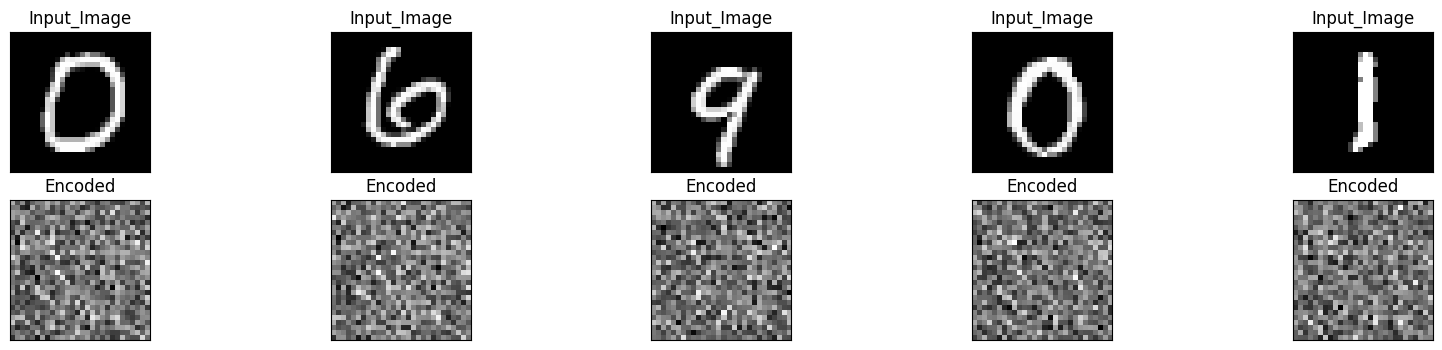

In [7]:
n=5
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(XTest[i+10].reshape(28, 28))
    plt.gray()
    plt.title("Input_Image")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(DecodedDigits[i+10].reshape(28, 28))
    plt.gray()
    plt.title("Encoded")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(XTest[i+10].reshape(28, 28))
plt.show()

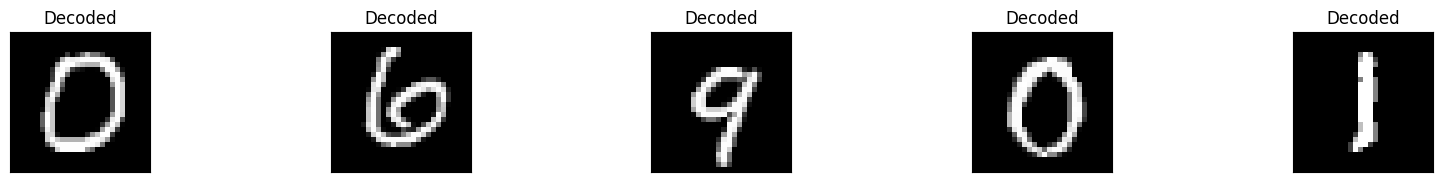

In [8]:
n=5
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(XTest[i+10].reshape(28, 28))
    plt.gray()
    plt.title("Decoded")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()